# 156 FINAL PROJECT

## Getting Data

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
import scipy
from tqdm import tqdm
import sklearn
import networkx as nx
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn import GATConv
from dgl import DGLGraph
import torch
from dgl import from_networkx
import time
import dgl
import time
from dgl.nn import AvgPooling, GNNExplainer

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()
np.random.seed(12)

In [107]:
df = pd.read_csv("data.csv")
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

## EDA

Text(0.5, 1.0, 'Correlation Matrix for Predictors')

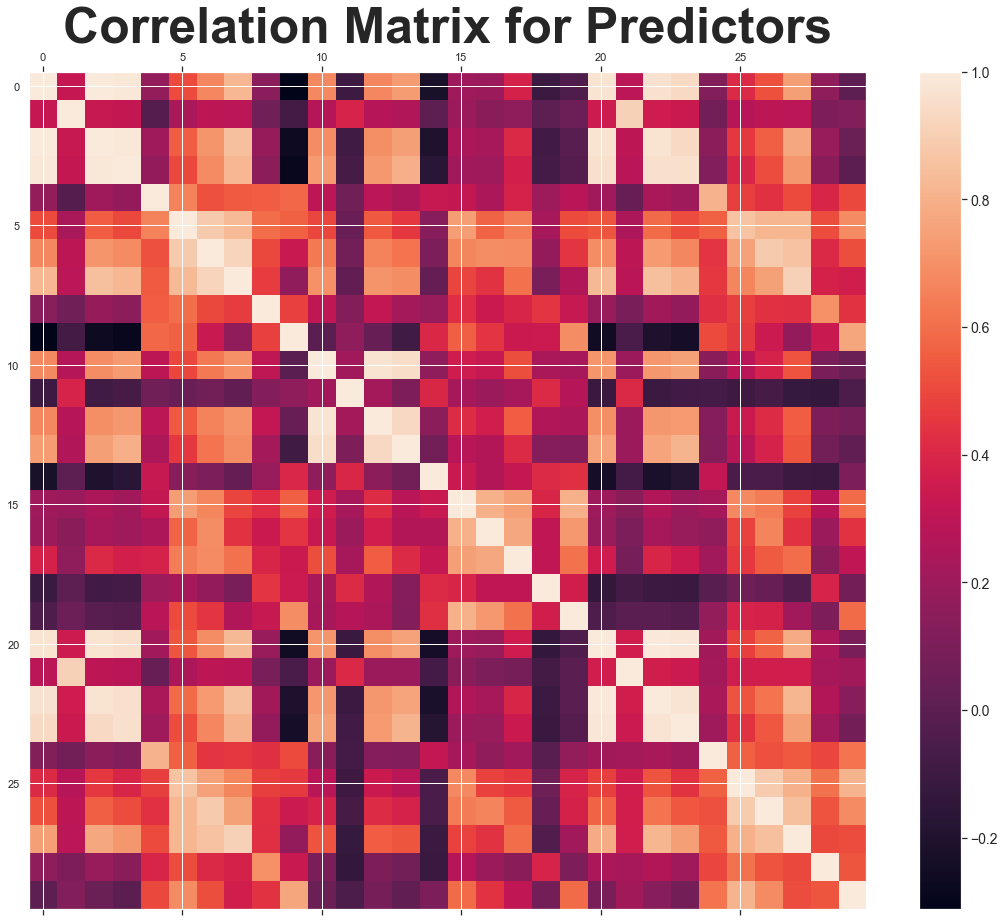

In [108]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.drop(['id'], axis=1).corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix for Predictors', fontsize = 50, fontweight = "bold")

diagnosis                    index           B            M     Ratio
0                      radius_mean   12.146524    17.462830  0.695564
1                     texture_mean   17.914762    21.604906  0.829199
2                   perimeter_mean   78.075406   115.365377  0.676766
3                        area_mean  462.790196   978.376415  0.473019
4                  smoothness_mean    0.092478     0.102898  0.898727
5                 compactness_mean    0.080085     0.145188  0.551593
6                   concavity_mean    0.046058     0.160775  0.286473
7              concave points_mean    0.025717     0.087990  0.292276
8                    symmetry_mean    0.174186     0.192909  0.902944
9           fractal_dimension_mean    0.062867     0.062680  1.002988
10                       radius_se    0.284082     0.609083  0.466410
11                      texture_se    1.220380     1.210915  1.007817
12                    perimeter_se    2.000321     4.323929  0.462617
13                  

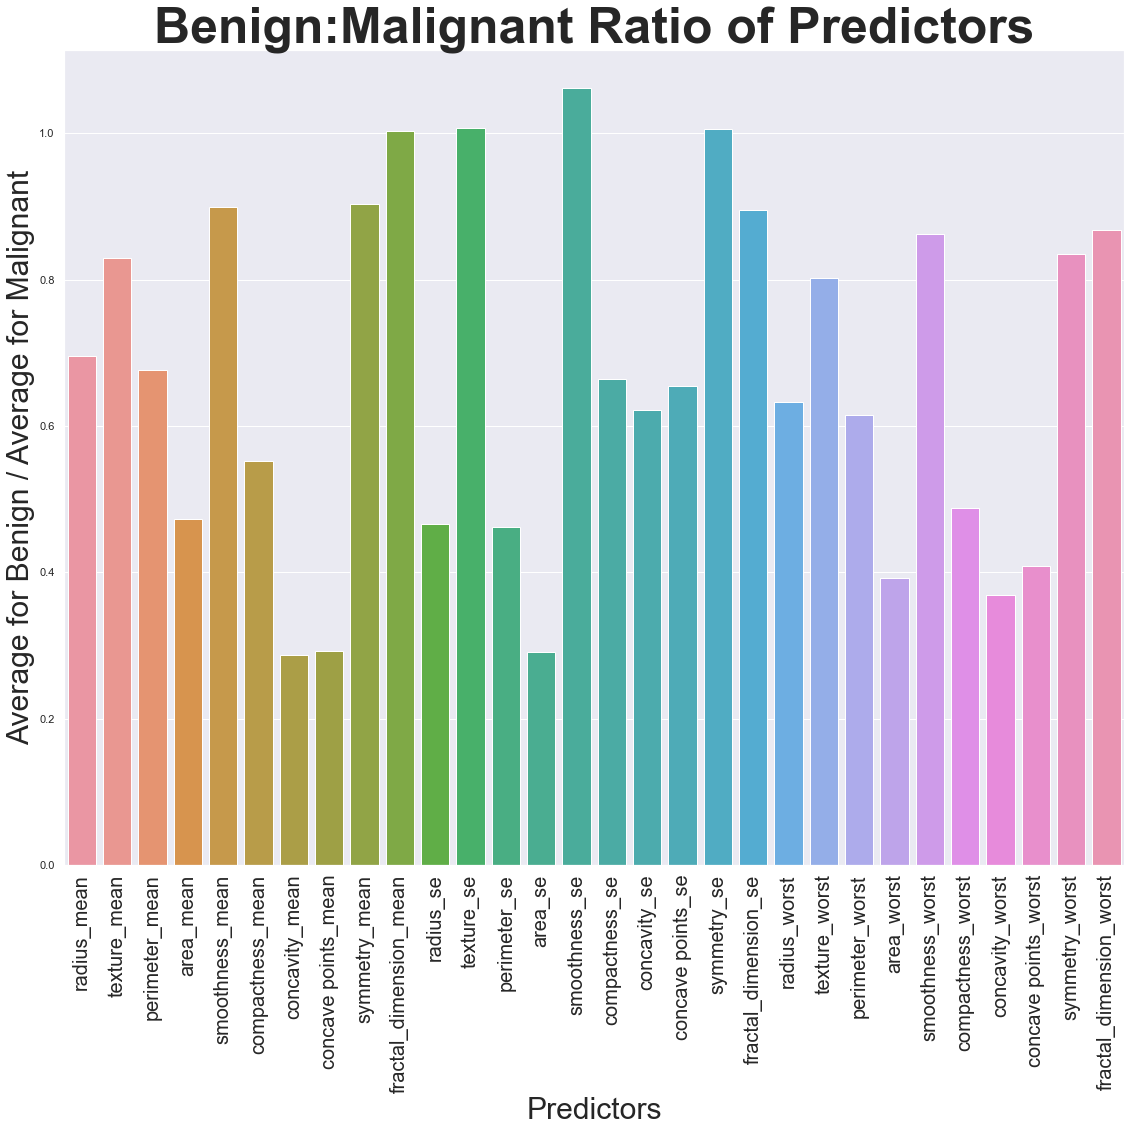

In [109]:
temp = df.groupby("diagnosis").mean().drop(['id'], axis=1).T
temp.reset_index(inplace = True)
temp["Ratio"] = temp["B"] / temp["M"]
print(temp)

plt.figure(figsize=(19, 15))
sns.barplot(data = temp, x = "index", y = "Ratio")
plt.xticks(rotation='vertical', fontsize = 20)
plt.title('Benign:Malignant Ratio of Predictors', fontsize = 50, fontweight = "bold")
plt.xlabel("Predictors", fontsize = 30)
plt.ylabel("Average for Benign / Average for Malignant", fontsize = 30)
plt.show()

## TRAINING SHITTY MODEL

In [110]:
#new_columns = [pd.DataFrame(np.random.normal(0, 1, size=(len(df), 1)), columns=['col{}'.format(i+1)]) for i in range(1000)]
#df = pd.concat([df] + new_columns, axis=1)
#df.to_csv("noisy_data.csv")
df = pd.read_csv("noisy_data.csv")

In [75]:
X = df.drop(['id', "diagnosis"], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [76]:
#log_reg = LogisticRegression(max_iter = 10000)

#cv = KFold(n_splits=5)
#scores = cross_val_score(log_reg, X_train, y_train, cv=cv)
#average_accuracy = scores.mean()
#print("Accuracies: ", scores)

#log_reg.fit(X_train, y_train)
#accuracy = log_reg.score(X_test, y_test)
#print("Test Accuracy: ", accuracy)

In [77]:
def convert_array(arr):
    new_arr = []
    for i in arr:
        if i == "B":
            new_arr.append(0)
        elif i == "M":
            new_arr.append(1)
    return new_arr

y_train = tf.convert_to_tensor(convert_array(y_train))
y_test = tf.convert_to_tensor(convert_array(y_test))

X_train = tf.convert_to_tensor(X_train.to_numpy())
X_test = tf.convert_to_tensor(X_test.to_numpy())

def plot_history(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    epochs = range(len(train_loss))

    # plot loss
    plt.clf()
    fig = plt.figure(figsize=(19, 15))
    plt.plot(train_loss, label='train_loss', lw = 5)
    plt.plot(test_loss, label='test_loss', lw = 5)
    plt.xlabel('Epoch', fontsize = 50)
    plt.ylabel('Loss', fontsize = 50)
    plt.xticks(epochs, rotation='vertical', fontsize = 20)
    plt.legend(loc='best')
    plt.title('Training and Testing Loss', fontsize = 50, fontweight = "bold")
    # plt.savefig("loss.png")
    plt.show()

    # plot acc
    plt.clf()
    fig = plt.figure(figsize=(19, 15))
    plt.plot(train_acc, label='train_acc', lw = 5)
    plt.plot(test_acc, label='test_acc', lw = 5)
    plt.xlabel('Epoch', fontsize = 50)
    plt.ylabel('Accuracy', fontsize = 50)
    plt.xticks(epochs, rotation='vertical', fontsize = 20)
    plt.legend(loc='best')
    plt.title('Training and Testing Accuracy', fontsize = 50, fontweight = "bold")
    # plt.savefig("acc.png")
    plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 2062      
                                                                 
Total params: 2,062
Trainable params: 2,062
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
15/15 [==============================] - 0s 8ms/step - loss: 2602.1641 - accuracy: 0.5077 - val_loss: 8427.4316 - val_accuracy: 0.3684
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 3110.7612 - accuracy: 0.4857 - val_loss: 195.1876 - val_accuracy: 0.5702
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 1852.7506 - accuracy: 0.5714 - val_loss: 1499.1250 - val_accuracy: 0.6579
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 1563.7662 - accuracy: 0.6176 - val_loss: 2989.5754 - val_accuracy: 0.64

<Figure size 432x288 with 0 Axes>

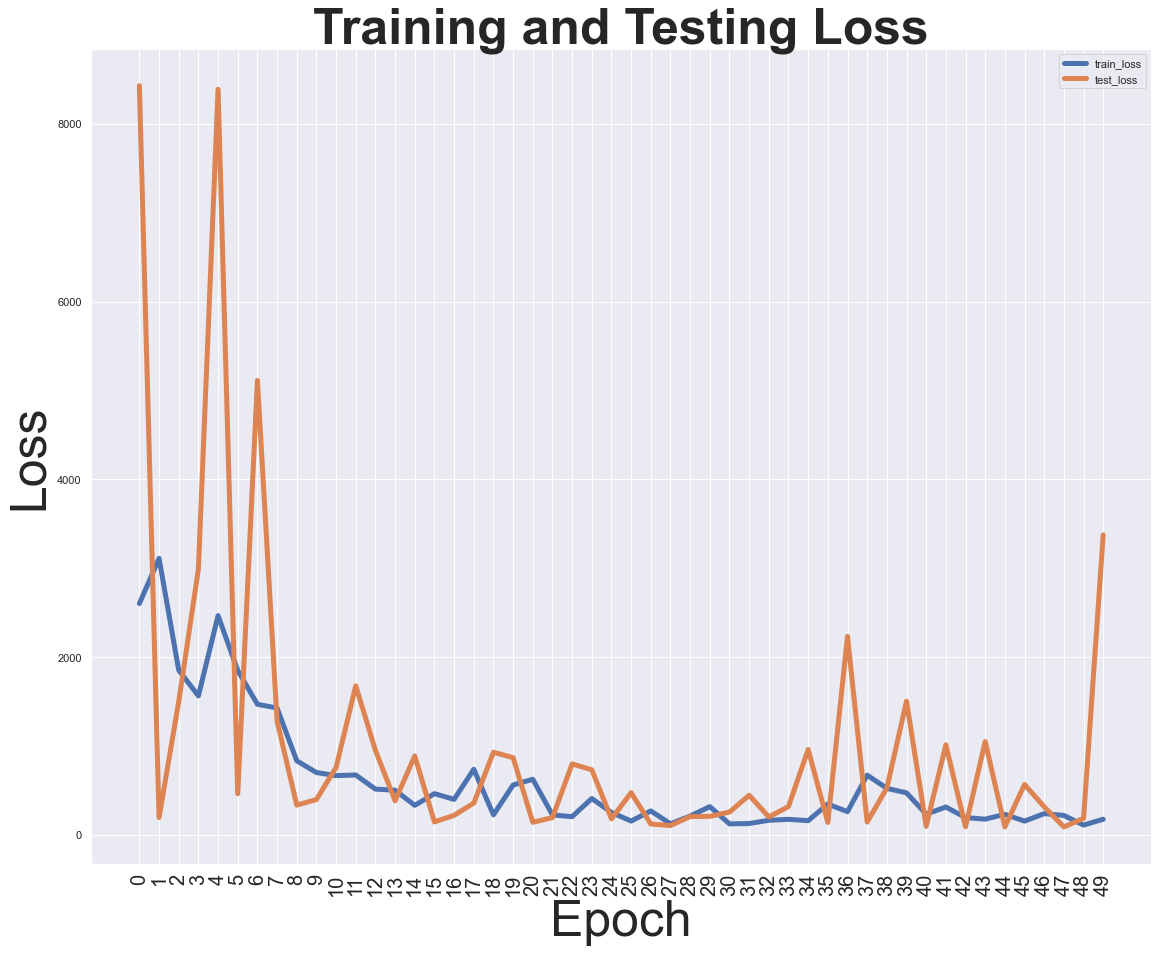

<Figure size 432x288 with 0 Axes>

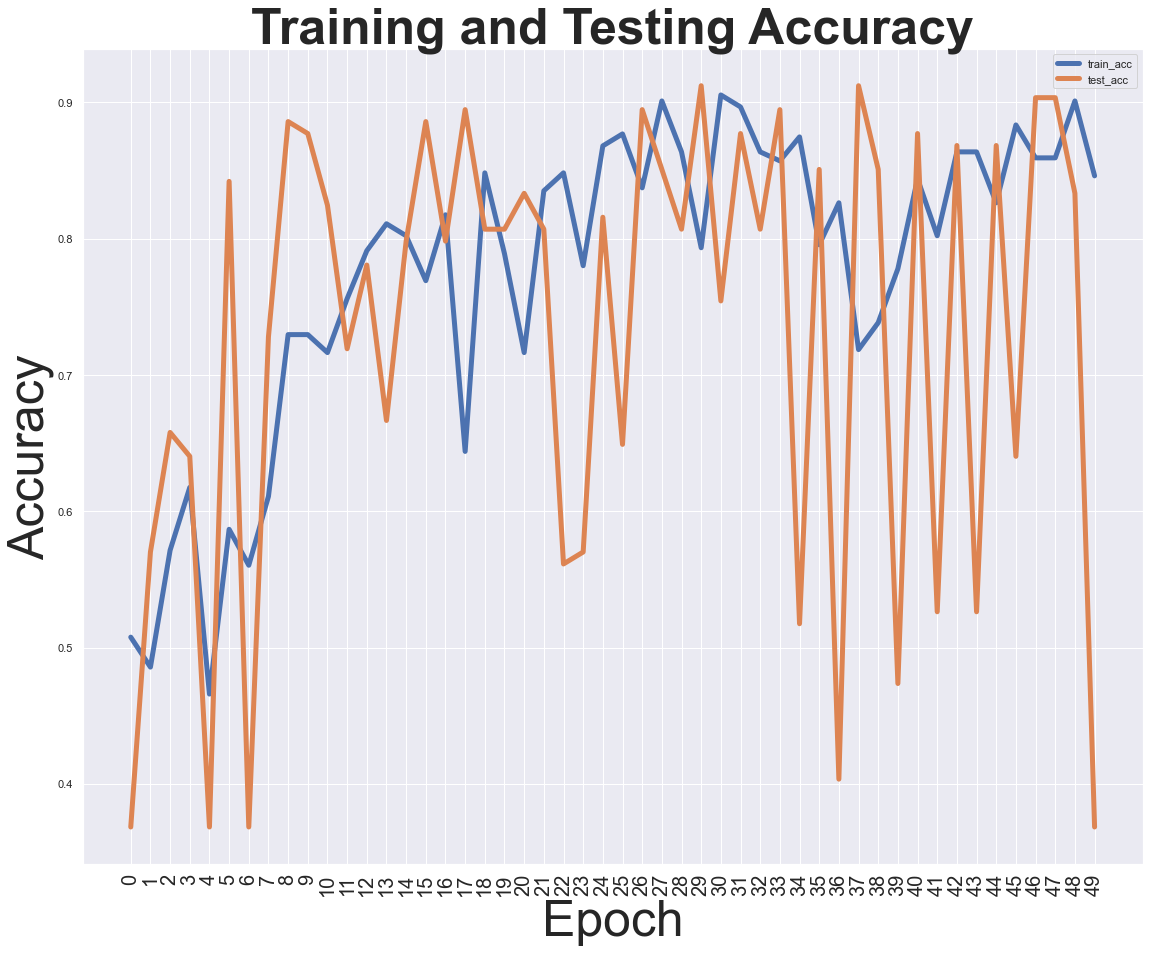

In [78]:
input_shape = (X_train.shape[1],)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(2, activation = "softmax")
])

# hyperparameters
learning_rate = .01
epochs = 50
batch_size = 32

# optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
# optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train the model

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# plot history

plot_history(history)

## Joint Fusion Shit

In [79]:
from scipy.spatial.distance import pdist, squareform


edge_data = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].to_numpy()

#using gaussian kernel
# exp(- |x - x'|^2 / std^2)
pairwise_dists = squareform(pdist(edge_data, 'euclidean'))
gauss_kern = np.exp(-pairwise_dists ** 2 / pairwise_dists.std() ** 2)
#gauss_kern[0]

In [80]:
G = nx.from_numpy_matrix(gauss_kern)
G.remove_edges_from(nx.selfloop_edges(G))
print("nodes:", len(G.nodes))
print("edges:", len(G.edges))

nodes: 569
edges: 161596


len: 161596
top 35 percent of edges: 64638.4
range (min, max): (1.9613509166359726e-21, 0.9999979130941485)
mean: 0.5192807450904305
std: 0.38050678097822654


Text(0.5, 1.0, 'Distribution of all Edges')

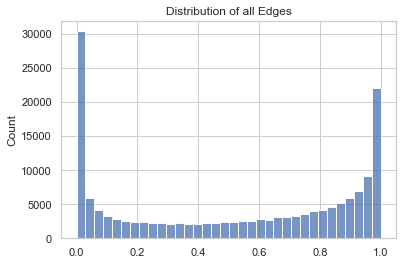

In [81]:
edge_val = [attrs["weight"] for a, b, attrs in G.edges(data=True)]
print("len:", len(edge_val))


percentage = 0.40

print("top 35 percent of edges: %s" % (percentage * len(edge_val)))

print("range (min, max): (%s, %s)" % (min(edge_val), max(edge_val)))
print("mean: %s" % (sum(edge_val) / len(edge_val)))
print("std: %s" % np.array(edge_val).std())


sns.set_style('whitegrid')
sns.histplot(edge_val)
plt.title("Distribution of all Edges")

In [82]:
ALL_edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
TOP_edges = ALL_edges[(161596 - int(percentage * 161596)):]
len(TOP_edges)

64638

len: 64638
range (min, max): (0.7407234100966549, 0.9999979130941485)
mean: 0.9148869024585812
std: 0.07666023944406453


Text(0.5, 1.0, 'Distribution of Top 35% Edges')

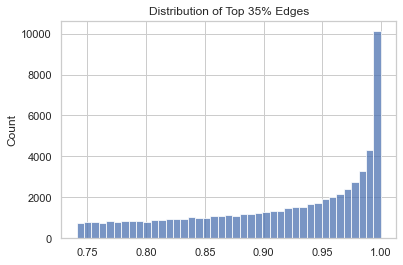

In [83]:
TOP_edge_val = [attrs["weight"] for a, b, attrs in TOP_edges]
print("len:", len(TOP_edge_val))

print("range (min, max): (%s, %s)" % (min(TOP_edge_val), max(TOP_edge_val)))
print("mean: %s" % (sum(TOP_edge_val) / len(TOP_edge_val)))
print("std: %s" % np.array(TOP_edge_val).std())

sns.set_style('whitegrid')
sns.histplot(TOP_edge_val)
plt.title("Distribution of Top 35% Edges")

In [84]:
#remove edges
remove_edges = [i for i in ALL_edges if i not in TOP_edges]
G.remove_edges_from(remove_edges)
print("nodes:", len(G.nodes))
print("edges:", len(G.edges))

nodes: 569
edges: 64638


In [85]:
#fig = plt.figure(figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
#axgrid = fig.add_gridspec(5, 4)

#ax = fig.add_subplot(axgrid[0:3, :])
#pos = nx.spring_layout(G, seed=10396953)
#nx.draw_networkx_nodes(G, pos, node_size=20)
#nx.draw_networkx_edges(G, pos, alpha=0.4)
#ax.set_title("Connected Components of Top 35% of Edges")
#ax.set_axis_off()

Text(0.5, 1.0, 'Sparsity of Adjacency Matrix')

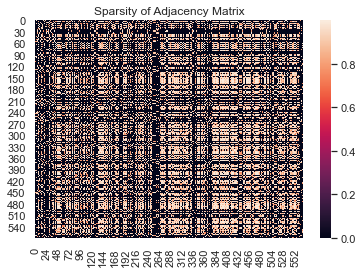

In [86]:
#get adjacency matrix --> DGL
nodes = list(G.nodes)
adj = nx.to_numpy_array(G, nodelist=nodes)
sns.heatmap(adj)
plt.title("Sparsity of Adjacency Matrix")

In [87]:
di_G = nx.from_numpy_matrix(adj, create_using = nx.DiGraph)
#this preserves the edge weights, represents an undirected graph
dgl_G = from_networkx(di_G, edge_attrs = ["weight"])
dgl_G

Graph(num_nodes=569, num_edges=129276,
      ndata_schemes={}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float32)})

In [88]:
dgl_G.edata["weight"]

tensor([0.9862, 0.8783, 0.9214,  ..., 0.8426, 0.8619, 0.9315])

In [89]:
#node labels
filter_ = {"B": 0, "M": 1}
data = df.replace({"diagnosis": filter_})

y_label = data["diagnosis"].to_list()
dgl_G.ndata["label"] = torch.from_numpy(np.array(y_label))

#node features
dgl_G.ndata["x"] = torch.from_numpy(data[data.columns[2:]].to_numpy())


#graph preprocessing done!
dgl_G

Graph(num_nodes=569, num_edges=129276,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int32), 'x': Scheme(shape=(1030,), dtype=torch.float64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float32)})

In [90]:
class GAT(nn.Module):
    def __init__(self, in_feats, h_feats, GAT_heads, num_GAT_layers = 1):
        """
        ARGS:
            in_feats are the dim of input features
            h_feats are the dim of hidden layers
            GAT_heads are num of attention heads
            num_GAT_layers are the num of GAT hidden layers (excluding input/output)
        
        """
        
        super(GAT, self).__init__()
    
        self.GAT_input = GATConv(in_feats, 
                                  h_feats, num_heads = GAT_heads, 
                                  allow_zero_in_degree = True)
        
        self.GAT_layers = nn.ModuleList([GATConv(h_feats * GAT_heads, 
                                                 h_feats, 
                                                 num_heads = GAT_heads, 
                                                 allow_zero_in_degree = True) 
                                         for i in range(num_GAT_layers)])

        self.GAT_output = GATConv(h_feats * GAT_heads, 
                                  h_feats, num_heads = 1, 
                                  allow_zero_in_degree = True)

        
        
    def forward(self, g: dgl.DGLGraph, in_feat: torch.Tensor) -> any:
        
        #GAT input layer
        h = self.GAT_input(g, in_feat)
        h = F.relu(h)
        h = torch.reshape(h, (in_feat.shape[0],-1) )
        
        #inner layers
        if len(self.GAT_layers) > 0:
            for layer in self.GAT_layers:
                h = layer(g, h)
                h = F.relu(h)
                h = torch.reshape(h, (in_feat.shape[0],-1) )
        
        #GAT output layer
        h = torch.reshape(h, (in_feat.shape[0],-1) )
        h = self.GAT_output(g, h)
        
        #return final representation
        return h

In [91]:

class MLP(nn.Module):
    def __init__(self, in_feats, h_feats, num_layers = 1):
        """
        ARGS:
            in_feats are the dimension of input features
            h_feats are the dimension of hidden layers
            num_layers are the number of the hidden layers
        """
        super(MLP, self).__init__()
        
        self.input_lin = nn.Linear(in_features = in_feats, out_features = h_feats) 
        
        self.lins = nn.ModuleList([nn.Linear(in_features = h_feats, out_features = h_feats) 
                                   for i in range(num_layers)])

    def forward(self, in_feat):
        
        h = self.input_lin(in_feat)
        
        #iterate through the layers
        for layer in self.lins:
            h = layer(h)
            h = F.relu(h)
        
        #return final representation
        return h          

In [92]:
class Joint_Fusion(torch.nn.Module):
    def __init__(self,
                 in_feats, 
                 GNN_hfeats, 
                 GNN_layers, 
                 MLP_hfeats, 
                 MLP_layers, 
                 classifier_layers, 
                 classifier_hfeats, 
                 num_classes = 1):
        
        super(Joint_Fusion, self).__init__()
        
        self.GNN = GAT(in_feats = in_feats, h_feats = GNN_hfeats, 
                       GAT_heads = 8, num_GAT_layers = GNN_layers)
        
        self.MLP = MLP(in_feats = in_feats, h_feats = MLP_hfeats, num_layers = MLP_layers)
        
        self.classifiers = nn.ModuleList([nn.Linear(in_features = GNN_hfeats + MLP_hfeats, 
                                                 out_features = classifier_hfeats) 
                                          for i in range(classifier_layers)])
        
        self.output_layer = nn.Linear(in_features = classifier_hfeats, out_features = num_classes)

        
        
    def forward(self, g, in_feat):
        
        GNN_feats = self.GNN(g, in_feat)
        MLP_feats = self.MLP(in_feat)
        
        #concatenate the representation
        GNN_feats = GNN_feats.squeeze()
        combined = torch.cat([GNN_feats, MLP_feats], dim=1)
        
        #run through classifier
        for classifier_layer in self.classifiers:
            h = classifier_layer(combined)
            h = F.relu(h)
            
        #output, binary classification
        h = self.output_layer(h)
        return h        

In [93]:
node_index, y_label, node_features = dgl_G.nodes(), np.array(dgl_G.ndata["label"]), np.array(dgl_G.ndata["x"])

print("shape of the node index: %s" % node_index.size())
print("shape of labels: %s" % str(y_label.shape))
print("shape of features: %s" % str(node_features.shape))

shape of the node index: 569
shape of labels: (569,)
shape of features: (569, 1030)


In [94]:
input_dim = node_features.shape[1]
print("length of input: %s" % input_dim)

length of input: 1030


In [95]:
dgl_G.edata

{'weight': tensor([0.9862, 0.8783, 0.9214,  ..., 0.8426, 0.8619, 0.9315])}

In [96]:
model_list = [
                Joint_Fusion(in_feats = input_dim,    #input node features
                             GNN_hfeats = 100,         #GNN hidden dim 
                             GNN_layers = 5,          #GNN hidden layers
                             MLP_hfeats = 50,         #MLP hidden dim
                             MLP_layers = 10,         #MLP hidden layers
                             classifier_layers = 10,   #classifier hidden layers
                             classifier_hfeats = 300, #classifier hidden dim
                             num_classes = 1) 
                for i in range(5)]


model_list[0]

Joint_Fusion(
  (GNN): GAT(
    (GAT_input): GATConv(
      (fc): Linear(in_features=1030, out_features=800, bias=False)
      (feat_drop): Dropout(p=0.0, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
    )
    (GAT_layers): ModuleList(
      (0): GATConv(
        (fc): Linear(in_features=800, out_features=800, bias=False)
        (feat_drop): Dropout(p=0.0, inplace=False)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (leaky_relu): LeakyReLU(negative_slope=0.2)
      )
      (1): GATConv(
        (fc): Linear(in_features=800, out_features=800, bias=False)
        (feat_drop): Dropout(p=0.0, inplace=False)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (leaky_relu): LeakyReLU(negative_slope=0.2)
      )
      (2): GATConv(
        (fc): Linear(in_features=800, out_features=800, bias=False)
        (feat_drop): Dropout(p=0.0, inplace=False)
        (attn_drop): Dropout(p=0.0, inplace=False)
     

In [97]:
!nvidia-smi

Wed Mar  8 15:54:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.37       Driver Version: 527.37       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   60C    P8     3W /  N/A |    159MiB /  4096MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [98]:
print("\n----------------------------------------------------------------------------")


#new data split with new seed
skf = StratifiedKFold(n_splits=5, shuffle = True)

accuracy = []
f_1 = []
precision = []
recall = []
probs_list = []
auc_list = []

#for each of the 5 splits
model_count = 0

for index, (train_index, test_index) in enumerate(skf.split(node_index, y_label)):

    #print(train_index[0:5], test_index[0:5])
    x_train_index, y_label_train = node_index[train_index], y_label[train_index]
    x_test_index, y_label_test = node_index[test_index], y_label[test_index]

    #one hot encode the labels
    y_label_train, y_label_test = [float(i) for i in y_label_train], \
                                  [float(i) for i in y_label_test]

    #create blank masks with all false
    train_mask, test_mask = [False for i in range(len(node_index))], \
                            [False for i in range(len(node_index))]

    #fill masks with true
    #x train index is a list of indexes that should be included for training
    for i in x_train_index:
        train_mask[i] = True
    for i in x_test_index:
        test_mask[i] = True

    #get everything ready for training
    device = "cpu"
    dgl_G = dgl_G.int().to(device)
    
    #labels are in (y_label_train, y_label_test)
    dgl_G.ndata["train_mask"] = torch.from_numpy(np.array(train_mask)).to(device)
    dgl_G.ndata["test_mask"] = torch.from_numpy(np.array(test_mask)).to(device)

    #labels to tensors
    y_label_train = torch.from_numpy(np.array(y_label_train)).to(device)
    y_label_test = torch.from_numpy(np.array(y_label_test)).to(device)

    #get indexes of train, test, val
    train_index = torch.nonzero(dgl_G.ndata["train_mask"]).squeeze()
    test_index = torch.nonzero(dgl_G.ndata["test_mask"]).squeeze()


    features = dgl_G.ndata["x"].float().to(device)
    train_mask = dgl_G.ndata["train_mask"].to(device)
    test_mask = dgl_G.ndata["test_mask"].to(device)
    train_index = train_index.to(device)
    test_index = test_index.to(device)

    model = model_list[model_count].to(device)

    #class weight raises the error of a certain class to account for imbalanced class types
    #pos_weight = 1
    #CHANGE THIS PARAMETER AS YOU SEE FIT
    pos_weight = [1.]

    #hyperparamters
    num_epochs = 50
    lr = 3e-3
    l2_wd = 5e-4

    #loss functions
    loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=torch.FloatTensor(pos_weight)).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = num_epochs)
    #validation loss

    model.train()
    epoch = 0
    prev_val_loss = 1e10
    threshold = 0.5

    for i in tqdm(range(num_epochs), desc = "fold training"):

        #get the predictions
        logits = model(dgl_G, features) 
        logits = logits
        loss = loss_fn(logits[train_index], y_label_train.unsqueeze(-1))

        #loss = loss_fn(logits[train_index], y_label_train.unsqueeze(-1)) # USE FOR GCN

        #get the probability of whole thing
        probs = torch.sigmoid(logits.detach()).cpu().numpy()
        #set a threshold and round it
        preds = (probs >= threshold).astype(int)
        
        #training acc
        train_acc = accuracy_score(y_true = y_label_train.cpu(), y_pred = preds[train_index.cpu()])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()


    accuracy.append(accuracy_score(y_true = y_label_test.cpu(), y_pred = preds[test_index.cpu()]))
    f_1.append(f1_score(y_true = y_label_test.cpu(), y_pred = preds[test_index.cpu()]))
    precision.append(precision_score(y_true = y_label_test.cpu(), y_pred = preds[test_index.cpu()]))
    recall.append(recall_score(y_true = y_label_test.cpu(), y_pred = preds[test_index.cpu()]))
    probs_list.append(probs)
    auc_list.append(roc_auc_score(y_true = y_label_test.cpu(), y_score = preds[test_index.cpu()]))

    model_count += 1

fold training:   0%|                                                                                                                                                                     | 0/50 [00:00<?, ?it/s]


----------------------------------------------------------------------------


fold training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:07<00:00,  1.36s/it]


In [99]:
acc_df = pd.DataFrame([accuracy, auc_list, f_1, precision, recall]).T
acc_df.index = ["Fold %s" % str(i + 1) for i in range(5)]
acc_df.columns = ["ACC", "AUC", "F1", "Precision", "Recall"]
acc_df.loc["AVG"] = acc_df.mean(axis = 0)
acc_df

,ACC,AUC,F1,Precision,Recall
Fold 1,0.877193,0.837209,0.805556,1.000000,0.674419
Fold 2,0.894737,0.874222,0.850000,0.918919,0.790698
Fold 3,0.903509,0.888889,0.864198,0.897436,0.833333
Fold 4,0.885965,0.855159,0.826667,0.939394,0.738095
Fold 5,0.858407,0.814386,0.771429,0.964286,0.642857
AVG,0.883962,0.853973,0.823570,0.944007,0.735880
